In [1]:
from molmap.model import RegressionEstimator, MultiClassEstimator, MultiLabelEstimator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from chembench import dataset
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from molmap import MolMap


RDKit WARNING: [15:11:35] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
data = dataset.load_ESOL()

total samples: 1128


In [3]:
mp = MolMap(ftype='descriptor',metric='cosine',)

In [4]:
mp.fit(verbose=0, method='umap', min_dist=0.1, n_neighbors=15,)

2020-09-04 15:11:42,950 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2020-09-04 15:11:45,356 - INFO - [bidd-molmap] - Finished


In [5]:
X = mp.batch_transform(data.x)

100%|##########| 1128/1128 [02:44<00:00,  6.81it/s]


In [6]:
Y = data.y

In [73]:
def Rdsplit(df, random_state = 888, split_size = [0.8, 0.1, 0.1]):
    base_indices = np.arange(len(df)) 
    base_indices = shuffle(base_indices, random_state = random_state) 
    nb_test = int(len(base_indices) * split_size[2]) 
    nb_val = int(len(base_indices) * split_size[1]) 
    test_idx = base_indices[0:nb_test] 
    valid_idx = base_indices[(nb_test):(nb_test+nb_val)] 
    train_idx = base_indices[(nb_test+nb_val):len(base_indices)] 
    print(len(train_idx), len(valid_idx), len(test_idx)) 
    return train_idx, valid_idx, test_idx 

In [74]:
train_idx, valid_idx, test_idx  = Rdsplit(data.df, random_state = 888)
trainX = X[train_idx]
trainY = Y[train_idx]
validX = X[valid_idx]
validY = Y[valid_idx]
testX = X[test_idx]
testY = Y[test_idx]

904 112 112


In [75]:
# define your model
clf = RegressionEstimator(n_outputs=trainY.shape[1], 
                          fmap_shape1 = trainX.shape[1:], dense_layers = [128, 64], y_scale= 'standard',  gpuid = 0) 


RegressionEstimator(y_scale='standard')


In [76]:
# fit your model
clf.fit(trainX, trainY, testX, testY)

epoch: 0001, loss: 1.0020 - val_loss: 0.9373; rmse: 2.0725 - rmse_val: 2.0388;  r2: 0.5727 - r2_val: 0.4414                                                                                                    
epoch: 0002, loss: 0.9573 - val_loss: 0.9103; rmse: 2.0383 - rmse_val: 2.0092;  r2: 0.6042 - r2_val: 0.4781                                                                                                    
epoch: 0003, loss: 0.9415 - val_loss: 0.8877; rmse: 2.0064 - rmse_val: 1.9841;  r2: 0.5633 - r2_val: 0.4321                                                                                                    
epoch: 0004, loss: 0.8943 - val_loss: 0.8601; rmse: 1.9664 - rmse_val: 1.9530;  r2: 0.5769 - r2_val: 0.4435                                                                                                    
epoch: 0005, loss: 0.8585 - val_loss: 0.8287; rmse: 1.9196 - rmse_val: 1.9170;  r2: 0.5663 - r2_val: 0.4368                                                             

RegressionEstimator(y_scale='standard')

In [77]:
testY_pred = clf.predict(testX)

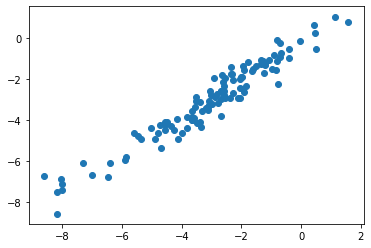

In [78]:
plt.scatter(testY, testY_pred)

In [79]:
clf._performance.evaluate(testX, testY)

([0.5408998114509362], [0.9333543119036956])

In [80]:
clf.score(testX, testY)

0.9333543119036956

In [81]:
clf._performance.evaluate(validX, validY)

([0.5406811873277783], [0.9314700697135013])